# Convolutional Neural Networks

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
%matplotlib inline

# Data Preparation

In [2]:
# organize data into train, valid, test dirs
os.chdir('/Users/manavgora/Desktop/Machine Learning/train2') # change directory
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
   
   # we are selecting only 500 from train data to make out task easy and 100, 50 similarly for valid and test data
    # So, random.sample(glob.glob()) would return a random sample of pathnames matching the specified pattern.
    for c in random.sample(glob.glob('cat*'), 500):
       shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 500):
       shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
       shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
       shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 50):
       shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'), 50):
       shutil.move(c, 'test/dog')
   
os.chdir('../../')

In [3]:
print(os.getcwd()) #get current working directly

/Users/manavgora/Desktop


In [4]:
print(os.listdir())
# to create new file, dir
# os.mkdir('new_dirt')

['Screenshot 2022-12-12 at 10.04.13 PM.png', 'Osho-Pics-Hd-Download.jpg', 'Machine Learning', 'Screenshot 2023-01-07 at 11.11.00 AM 3.png', 'MATNURE_MATNURE.pptx', 'Screenshot 2023-10-29 at 8.10.35 PM.png', 'Visual Studio Code.app', 'Project.pptx', 'love.mp4', 'VSCode-darwin-arm64.zip', "['].mp4", 'new_puc.jpg', 'Screenshot 2022-12-12 at 10.09.13 PM.png', 'new123-release.apk', 'osho_1.jpeg', 'The Book of Mirdad_ The strange story of a monastery which was once called The Ark ( PDFDrive ).epub', '1691565564__Coding_Ninjas_Machine_Learning_and_Data_Science.7z_part', 'MATNURE', 'Format_Internship_Report_2022_Manav (2)[1].docx', 'हँसना क्यों जरूरी है #osho #hindutvaunited.mp4', 'Screenshot 2023-05-26 at 6.46.28 PM.png', 'matnure_text.docx', 'payload.dd.txt', 'Screenshot 2022-12-12 at 10.09.46 PM.png', 'final report.docx', 'final_synopsis.pdf', 'Screenshot 2022-11-24 at 11.38.08 AM.png', 'Screenshot 2023-02-18 at 12.16.08 AM.png', 'puc-high-resolution-color-logo.png', 'COA-1 Manav Gora-24 (1

+ os.getcwd()                                            => get current working directory
+ os.chdir(<path>)                                    => change directory 
+ os.listdir()	                                            => list directory
+ os.mkdir(<dirname>)                           => create a directory
+ os.makedirs(<dirname>)                    => make directories recursively
+ os.rmdir(<dirname>)	                   => remove directory
+ os.removedirs(<dirname>)                => remove directory recursively
+ os.rename(<from>, <to>)                   => rename file
+ os.stat(<filename>)                            => print all info of a file
+ os.walk(<path>)	                          => traverse directory recursively
+ os.environ		                                 => get environment variables
+ os.path.join(<path>, <file>)              => join path without worrying about /
+ os.path.basename(<filename>)     => get basename
+ os.path.dirname(<filename>)         => get dirname
+ os.path.exists(<path-to-file>)         => check if the path exists or not
+ os.path.splitext(<path-to-file>)      => split path and file extension
+ dir(os)			                               => check what methods exists


In [5]:
train_path = '/Users/manavgora/Desktop/Machine Learning/train2/train'
valid_path = '/Users/manavgora/Desktop/Machine Learning/train2/valid'
test_path = '/Users/manavgora/Desktop/Machine Learning/train2/test'

In [6]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [7]:
# to verify the same case
# assert train_batches.n == 1000
# assert valid_batches.n == 200
# assert test_batches.n == 100
# assert train_batches.num_classes==valid_batches.num_classes==test_batches.num_classes ==2

In [8]:
imgs, labels = next(train_batches)

In [9]:
# This function will plot images in the form of a grid with 1 row and 10 columns.
#directly from tensorflow website

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

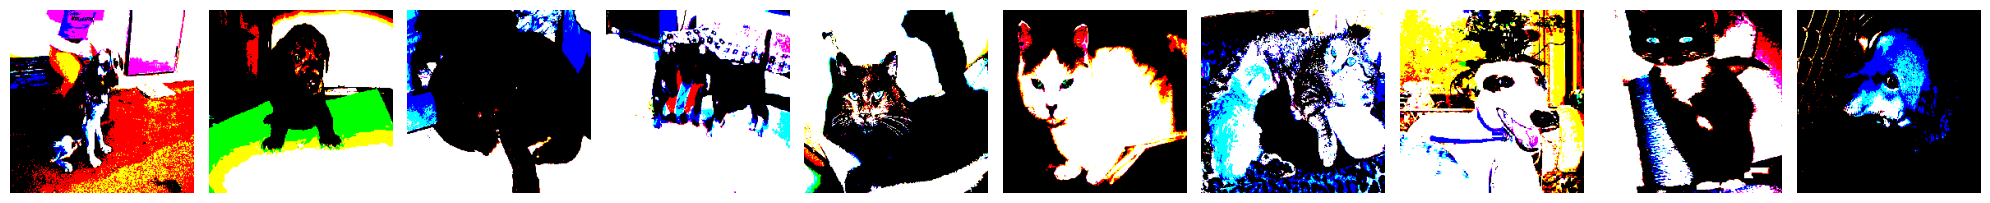

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [10]:
plotImages(imgs)
print(labels)

# Build and Train a CNN

In [11]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 25s - loss: 17.6217 - accuracy: 0.5750 - val_loss: 7.7350 - val_accuracy: 0.6000 - 25s/epoch - 246ms/step
Epoch 2/10
100/100 - 27s - loss: 2.4079 - accuracy: 0.7640 - val_loss: 3.4179 - val_accuracy: 0.6500 - 27s/epoch - 274ms/step
Epoch 3/10
100/100 - 28s - loss: 0.7139 - accuracy: 0.8840 - val_loss: 2.9501 - val_accuracy: 0.6250 - 28s/epoch - 283ms/step
Epoch 4/10
100/100 - 28s - loss: 0.2265 - accuracy: 0.9430 - val_loss: 3.1158 - val_accuracy: 0.6150 - 28s/epoch - 279ms/step
Epoch 5/10
100/100 - 26s - loss: 0.1303 - accuracy: 0.9570 - val_loss: 2.8103 - val_accuracy: 0.6250 - 26s/epoch - 257ms/step
Epoch 6/10
100/100 - 24s - loss: 0.1151 - accuracy: 0.9750 - val_loss: 3.0903 - val_accuracy: 0.6500 - 24s/epoch - 242ms/step
Epoch 7/10
100/100 - 25s - loss: 0.0110 - accuracy: 0.9960 - val_loss: 2.7045 - val_accuracy: 0.6650 - 25s/epoch - 250ms/step
Epoch 8/10
100/100 - 26s - loss: 0.0054 - accuracy: 0.9990 - val_loss: 2.5552 - val_accuracy: 0.6600 - 26s/epoch - 26

# Predict

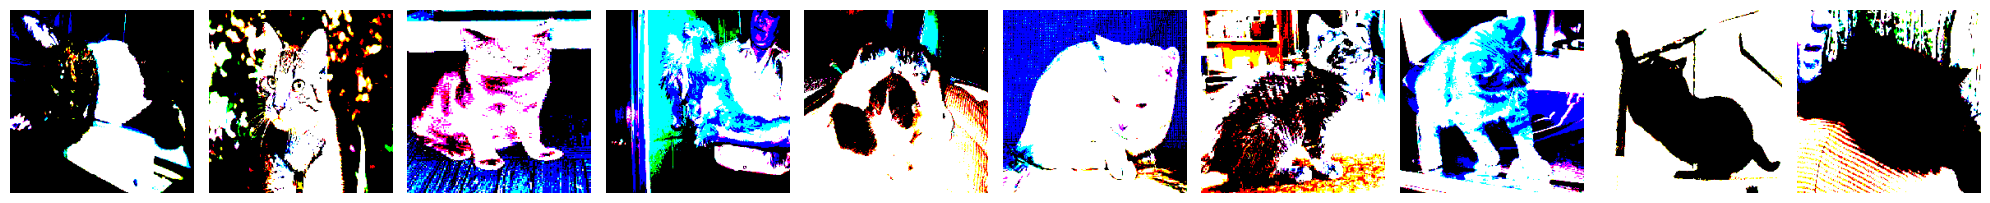

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [15]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [16]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [17]:
predictions = model.predict(x=test_batches, verbose=0)

In [18]:
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [19]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [20]:
# directly imported from scikit_learn website.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[29 21]
 [21 29]]


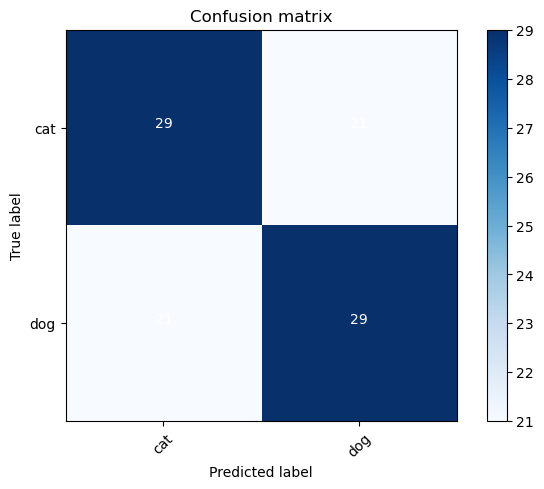

In [22]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion matrix')

# Data Augmentation:-
    
    1. Flipping the image either horizontally or vertically
    2. Rotating the image
    3. Zooming in or out onn the image
    4. Cropping the image
    5. Varying the color on the image

In [23]:
# This function will plot images in the form of a grid with 1 row and 10 columns.
#directly from tensorflow website

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [24]:
print(os.getcwd())

/Users/manavgora/Desktop


In [25]:
os.chdir('/Users/manavgora/Desktop/Machine Learning/train2/train/dog')

In [26]:
print(os.getcwd())

/Users/manavgora/Desktop/Machine Learning/train2/train/dog


In [27]:
gen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, channel_shift_range=10., horizontal_flip=True)

In [28]:
chosen_image = random.choice(os.listdir('/Users/manavgora/Desktop/Machine Learning/train2/train/dog'))

In [31]:
image_path = '/Users/manavgora/Desktop/Machine Learning/train2/train/dog/' + chosen_image

In [33]:
assert os.path.isfile(image_path)

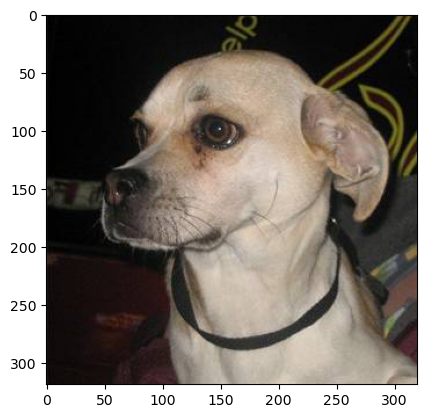

In [36]:
# Obtain image
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [37]:
# Generate batches of augmented images form this image
aug_iter = gen.flow(image)

In [39]:
# get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

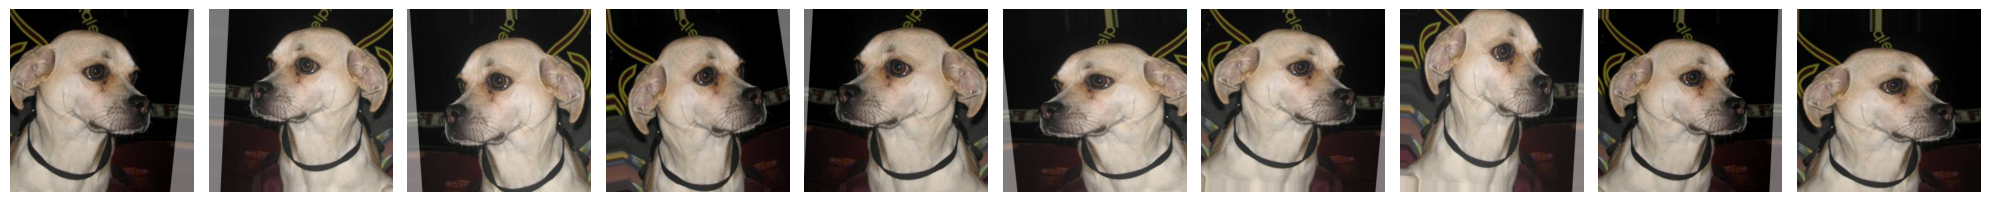

In [40]:
plotImages(aug_images)

# Build Fine-tuned VGG16 model

In [1]:
#download model 
vgg16_model = tf.keras.applications.vgg16.VGG16()

<IPython.core.display.Javascript object>

553467096/553467096 [==============================] - 55s 0us/step


In [2]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     